# Hypothesis Testing

## Lecture for Galvanize DSI

#### Darren Reger

# Objectives - Morning

- Understand the difference between estimation and hypothesis testing
- Discuss the differences between Type I & Type II error
- Be able to perform a hypothesis test
- Know when to use a 1-tailed vs. 2-tailed test
- Be able to compare means and proportions
- Test multiple hypotheses correctly

# Central Limit Theorem

- Under certain conditions, the **mean** of a sufficiently large number of i.i.d. random variables will be approximately normal, **regardless** of the underlying distribution.

<img src='clt.png'></img>

# Central Limit Theorem

Not only is the sample mean normally distributed, we also have:

$\bar{X} $~$ Normal(\mu,\frac{\sigma^2}{n})$

Like any other normal random variable, we can derive a standard normal Z-score:

$Z = \frac{\bar{X}-\mu}{\frac{\sigma}{\sqrt{n}}}$

# Estimation vs. Hypothesis Testing

## Estimation
- The value of the parameter is unknown
- Goal is to find a point estimate and confidence interval for likely value

## Hypothesis Testing
- The value of the parameter is stated
- Goal is to determine how reasonable/unreasonable this value is

# Null Hypothesis vs. Alternative Hypothesis

## Null Hypothesis
- Typically a measure of the status quo (assume no effect)

## Alternative Hypothesis
- Typically the effect a researcher hopes to measure

### Innocent ($H_0$) until proven guilty ($H_1$)

<img src="Hyp1.png">

# Hypothesis Testing Steps

1. State the null ($H_0$) and the alternative ($H_1$) hypotheses
2. Choose a level of significance ($\alpha$)
    - Threshold used to determine whether we reject or fail to reject
    - Probability of rejecting the null when it is in fact true
3. Choose an appropriate statistical test and find the test statistic
4. Compute the p-value and draw conclusions
    - Reject $H_0$ in favor of $H_1$
    - Fail to reject $H_0$


# Type I vs. Type II Error

**Employers ask this**

Type I error:    P(Type I) = P(Reject $H_0$ | $H_0$ is true) 

Type II error:   P(Type II) = P(Fail to Reject $H_0$ | $H_0$ is false)

<img src='error_type.png'>

# 1 vs. 2 Tailed Tests

P-value: Probability of observing the data we observed, or more extreme, given that the null hypothesis is true.

<img src='Hyp_table.png', width = "70%">

# One Sample Test of Population Mean

**Problem**: Let's say the average IQ of DSI students is 100 and we believe that all our students are really smart and that the actual average IQ is higher than 100.
To test this we randomly sample 5 students and find the following scores: 91,101,111,121,131
Is there sufficient evidence to say that the average IQ is higher?

**Step 1**:

$H_0$: $\mu$ = 100

$H_1$: $\mu$ > 100

**Step 2**:

1-tailed test, $\alpha$ = 0.05

**Step 3**:

$t= \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$ > critical value?

Use t when $\sigma$ is unknown and n < 30, but if you're not sure, just use a t

http://rpsychologist.com/d3/tdist/ example

**Step 4**:

Reject or fail to reject null hypothesis


```import scipy.stats as scs
import numpy as np
numbers = [91,101,111,121,131]
mu =
alpha =
xbar = #use numpy
std = #use numpy, be careful with degrees of freedom
n= #use a list method
dof = 
t_value = scs.t.ppf(1-alpha,dof)
t_stat = #use the formula for the t-statistic
print "Degrees of freedom = {:d}".format(dof)
print "xbar = {:0.1f}".format(xbar)
print "Standard Deviation = {:0.3f}".format(std)
print "T-value = {:0.3f}".format(t_value)
print "T-statistic = {:0.3f}".format(t_stat)
print "The t-statistic is greater than the t-value: {}".format(t_stat>t_value)```

In [2]:
import scipy.stats as scs
import numpy as np
numbers = [91,101,111,121,131]
mu = 100
alpha = 0.05
xbar = np.mean(numbers)
std = np.std(numbers,ddof = 1)
n=len(numbers)
dof = n - 1
t_value = scs.t.ppf(1-alpha,dof)
t_stat = (xbar-mu)/(std/np.sqrt(n))
print "Degrees of freedom = {:d}".format(dof)
print "xbar = {:0.1f}".format(xbar)
print "Standard Deviation = {:0.3f}".format(std)
print "T-value = {:0.3f}".format(t_value)
print "T-statistic = {:0.3f}".format(t_stat)
print "The t-statistic is greater than the t-value: {}".format(t_stat>t_value)

Degrees of freedom = 4
xbar = 111.0
Standard Deviation = 15.811
T-value = 2.132
T-statistic = 1.556
The t-statistic is greater than the t-value: False


In [3]:
#2 tailed test
numbers = [91,101,111,121,131]
mu = 100
alpha = 0.025
xbar = np.mean(numbers)
std = np.std(numbers,ddof = 1)
n=len(numbers)
dof = n - 1
t_value1 = scs.t.ppf(alpha,dof)
t_value2 = scs.t.ppf(1-alpha,dof)
t_stat = (xbar-mu)/(std/np.sqrt(n))
print "Degrees of freedom = {:d}".format(dof)
print "xbar = {:0.1f}".format(xbar)
print "Standard Deviation = {:0.3f}".format(std)
print "T-values = {:0.3f},{:0.3f}".format(t_value1,t_value2)
print "T-statistic = {:0.3f}".format(t_stat)
print "The t-statistic is greater than the t-value: {}".format(t_stat>t_value)

Degrees of freedom = 4
xbar = 111.0
Standard Deviation = 15.811
T-values = -2.776,2.776
T-statistic = 1.556
The t-statistic is greater than the t-value: False


# Use Scipy!

In [4]:
print scs.ttest_1samp(numbers,mu)

print '\nMake it readable'
print 'T-statistic = {0}\np-value = {1}'.format(scs.ttest_1samp(numbers,mu)[0],scs.ttest_1samp(numbers,mu)[1])
#scipy only does 2 tailed tests but that's okay because we just take p/2!

Ttest_1sampResult(statistic=1.5556349186104046, pvalue=0.19477503277472785)

Make it readable
T-statistic = 1.55563491861
p-value = 0.194775032775


# One Sample Test of Population Proportion

**Problem**: Suppose my girlfriend and I flip a coin to see who has to do the dishes. She believes that I'm being nice and losing on purpose (i.e. my chances of winning < 50%). In the random sample of 200 days out of the year, I only won 82 times. Was I rigging the coin toss?

**Step 1**:

$H_0$: p = 0.5

$H_1$: p < 0.5

**Step 2**:

1-tailed test, $\alpha$ = 0.01

**Step 3**:

Z-test: Rough rule to see if z-test is okay is if $\hat{p}$N > 5 and (1-$\hat{p}$)N > 5

$z = \frac{\hat{p}-p}{\sqrt{\frac{{p}(1-{p})}{n}}}$ > critical value?

**Step 4**:

Reject or fail to reject null hypothesis

```total = 
won = 
p = 
phat =
alpha = 
z_value = scs.norm.ppf(alpha)
z_stat = 
print "Phat = {:0.1f}".format(phat)
print "Z-value = {:0.3f}".format(z_value)
print "Z-statistic = {:0.3f}".format(z_stat)
print "The z-statistic is less than the z-value: {}".format(z_stat < z_value)```

In [5]:
total = 200.0
won = 82
p = 0.5
phat = won/total
alpha = 0.01
z_value = scs.norm.ppf(alpha)
z_stat = (phat-p)/(np.sqrt((p*(1-p))/total))
print "Phat = {:0.1f}".format(phat)
print "Z-value = {:0.3f}".format(z_value)
print "Z-statistic = {:0.3f}".format(z_stat)
print "The z-statistic is less than the z-value: {}".format(z_stat < z_value)

Phat = 0.4
Z-value = -2.326
Z-statistic = -2.546
The z-statistic is less than the z-value: True


In [3]:
# There is no scipy version, but there is a statsmodels one!
import statsmodels.stats.proportion as ssp
z_stat, p_value = ssp.proportions_ztest(82, 200, 0.5, 'smaller', prop_var=0.5)
print "The Z-statistic is {}\nThe p-value is {}".format(z_stat, p_value)

The Z-statistic is -2.54558441227
The p-value is 0.00545474918213


# Two Sample Comparison of Means

**Step 1**:

$H_0$: $\mu_1 - \mu_2 = D$  (D can be 0 when you just want to know if they're different)

$H_1$: $\mu_1 - \mu_2 \neq D$

**Step 2**:

Choose level of significance, $\alpha$

**Step 3**:

$t= \frac{\bar{x1}-\bar{x2}-D}{\sqrt{\frac{s_1^2}{{n_1}}+\frac{s_2^2}{{n_2}}}}$ > critical value?

**Step 4**:

Reject or fail to reject null hypothesis


In [7]:
import scipy.stats as scs
np.random.seed(12345678)
rvs1 = scs.norm.rvs(loc=5,scale=10,size=500)
rvs2 = scs.norm.rvs(loc=5,scale=10,size=500)
print scs.ttest_ind(rvs1,rvs2)
print scs.ttest_ind(rvs1,rvs2, equal_var = False)
print '\nSame sample size, unequal variance'
rvs3 = scs.norm.rvs(loc=5, scale=20, size=500)
print scs.ttest_ind(rvs1, rvs3)
print scs.ttest_ind(rvs1, rvs3, equal_var = False)

Ttest_indResult(statistic=0.26833823296238857, pvalue=0.78849443369565098)
Ttest_indResult(statistic=0.26833823296238857, pvalue=0.78849452749501059)

Same sample size, unequal variance
Ttest_indResult(statistic=-0.46580283298287956, pvalue=0.64145827413435608)
Ttest_indResult(statistic=-0.46580283298287956, pvalue=0.64149646246568737)


In [8]:
print 'Unequal variance and sample size'
rvs4 = scs.norm.rvs(loc=5, scale=20, size=100)
print scs.ttest_ind(rvs1, rvs4)
print scs.ttest_ind(rvs1, rvs4, equal_var = False)
print '\nUnequal variance, mean and sample size'
rvs5 = scs.norm.rvs(loc=8, scale=20, size=100)
print scs.ttest_ind(rvs1, rvs5)
print scs.ttest_ind(rvs1, rvs5, equal_var = False)

Unequal variance and sample size
Ttest_indResult(statistic=-0.99882539442782847, pvalue=0.31828327091038783)
Ttest_indResult(statistic=-0.69712570584654354, pvalue=0.48716927725401871)

Unequal variance, mean and sample size
Ttest_indResult(statistic=-1.4679669854490669, pvalue=0.14263895620529113)
Ttest_indResult(statistic=-0.94365973617133081, pvalue=0.34744170334794089)


# What if we want to test a difference?

## How would we do that?

In [40]:
rvs1 = scs.norm.rvs(loc=5,scale=10,size=500)
rvs6 = scs.norm.rvs(loc=8, scale=20, size=300)
print 'With pooled variance:'
print scs.ttest_ind(rvs1, rvs6)
print 'With separate variance:'
print scs.ttest_ind(rvs1, rvs6, equal_var = False)

With pooled variance:
Ttest_indResult(statistic=-2.2117434479841167, pvalue=0.027267025426120851)
With separate variance:
Ttest_indResult(statistic=-1.903676629758188, pvalue=0.057684958136564178)


In [41]:
print 'With a difference:'
# different answer than above, what went wrong????
print scs.ttest_ind_from_stats(np.mean(rvs1), np.std(rvs1), len(rvs1), 
                               np.mean(rvs6), np.std(rvs6), len(rvs6), equal_var = False)

With a difference:
Ttest_indResult(statistic=-1.9066886156925682, pvalue=0.057292118186415067)


In [47]:
print scs.ttest_ind_from_stats(np.mean(rvs1), np.std(rvs1, ddof=1), len(rvs1), 
                               np.mean(rvs6) - 3, np.std(rvs6, ddof=1), len(rvs6), equal_var = False)

Ttest_indResult(statistic=0.50411284052167915, pvalue=0.61446551276843409)


# Two Sample Comparison of Proportions

**Step 1**:

$H_0$: $p_1 - p_2 = D$

$H_1$: $p_1 - p_2 \neq D$

**Step 2**:

choose level of significance $\alpha$

**Step 3**:

Z-test: Rough rule to see if z-test is okay is if pN > 5 and p(1-n) > 5

$z = \frac{\hat{p_1}-\hat{p_0}-D}{\sqrt{\frac{\hat{p_1}(1-\hat{p_1})}{n_1}+\frac{\hat{p_2}(1-\hat{p_2})}{n_2}}}$ > critical value?

**Step 4**:

Reject or fail to reject null hypothesis

In [5]:
# Testing a difference with statsmodels
ssp.proportions_ztest([90, 110], [200,200])

(-2.0000000000000004, 0.045500263896358355)

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def make_bonf_graph(alpha,n,bonf=True):
    x_range = range(1,n)
    if bonf == True:
        y_range = [(1- (1-alpha/n)**n) for n in range(1,n)]
        title = 'Bonferroni Correction Graph'
    else:
        y_range = [(1- (1-alpha)**n) for n in range(1,n)]
        title = 'Why Multiple Testing is Bad'
    plt.plot(x_range,y_range)
    plt.xlabel('number of tests')
    plt.title(title)

# Multiple Testing

- Testing a set of multiple hypotheses simultaneously


<img src='bonfatt.png'>

# Multiple Testing
## Why is it bad?
- We could test each hypothesis separately

$P$(one significant result) $=$ $1 - P$(no significant results)

$P$(one significant result) $=$ $1- (1-0.05)^{20}$ $=$ $0.64$

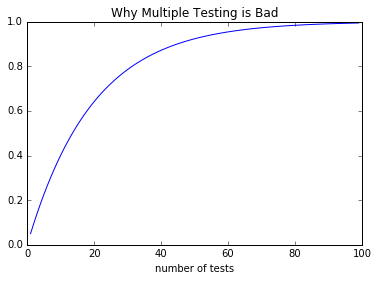

In [12]:
make_bonf_graph(0.05,100,bonf=False)

# Bonferroni Correction

20 sample case

$\frac{\alpha}{n} = \frac{0.05}{20} = 0.0025$

$P$(one significant result) $=$ $1 - P$(no significant results)

$P$(one significant result) $=$ $1-(1-0.0025)^{20}$ $=$ $0.0488$

$\Rightarrow$ Bonferroni is slightly conservative

# Bonferroni Correction

<img src='abvenn.gif'>

$\frac{\alpha}{n}$ $\rightarrow$ new $\alpha$

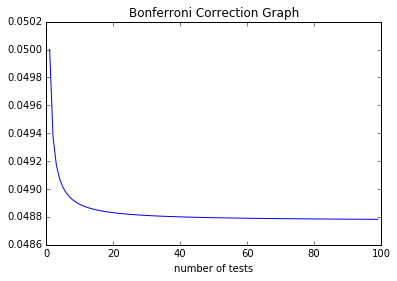

In [13]:
make_bonf_graph(0.05,100)

# Outline - Afternoon Lecture

- Know when to use a $\chi^2$ test
- Perform a $\chi^2$ test
- Understand experiment design
- Be aware of confounding factors

# Chi-Squared Test
# $$\chi^2$$

1. Estimating whether two random variables are independent.
2. Estimating how closely an observed distribution matches an expected distribution - we'll refer to this as the goodness-of-fit test


# Independence Example

Question: Is voting behavior independent of gender?

$$\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i}$$

**Actual**

|      |Repub| Dem  | Other |
| -----|-----|------|-------|
|Male  |26   |13    |5      |
|Female|20   |29    |7      |

# Independence Example

Question: Is voting behavior independent of gender?

$$\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i}$$

**Actual**

|      |Repub| Dem  | Other | Total |
| -----|-----|------|-------|-------|
|Male  |26   |13    |5      |44     |
|Female|20   |29    |7      |56     |
|Total |46   |42    |12     |100    |

**Actual**

|      |Repub| Dem  | Other | Total |
| -----|-----|------|-------|-------|
|Male  |26   |13    |5      |44     |
|Female|20   |29    |7      |56     |
|Total |46   |42    |12     |100    |
**Expected**

|      |Repub| Dem  | Other |
| -----|-----|------|-------|
|Male  |20.24|18.48 |5.28   |
|Female|25.76|23.52 |6.72   |

Critical value for 2 degrees of freedom = 5.991

# Use Scipy!

In [14]:
cont_table = np.array([[26,13,5],[20,29,7]])
print scs.chi2_contingency(cont_table)
chi2,pval,dof,exp_array = scs.chi2_contingency(cont_table)
print "\nClean it up!\n"
print "Chi2 Value: {0}\np-value: {1}\ndof: {2}\nExpected Value Array:\n{3}".format(chi2,pval,dof,exp_array)

(5.8554993143502472, 0.05351733509077522, 2, array([[ 20.24,  18.48,   5.28],
       [ 25.76,  23.52,   6.72]]))

Clean it up!

Chi2 Value: 5.85549931435
p-value: 0.0535173350908
dof: 2
Expected Value Array:
[[ 20.24  18.48   5.28]
 [ 25.76  23.52   6.72]]


# Chi-Square Goodness of Fit Test

- How well does the expected model fit the data?

- Assume that observations fall into bins and the chance that an observation falls into a bin is a certain percentage.

- ex. did the expected number of users of the app each day match reality?

- ex. is churn behavior independent of operating system?

# Goodness of Fit - Example

$$\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i}$$

Dice Game: 


|Value  |Observed Frequency|Expected Frequency|
|-------|------------------|------------------|
|1      |16                |?                 |
|2	    |5	               |?                 |
|3	    |9	               |?                 |
|4	    |7	               |?                 |
|5	    |6	               |?                 |
|6	    |17	               |?                 |
|Total	|60	               |?                 |

# Goodness of Fit - Example

$$\chi^2 = \sum_{i} \frac{(O_i - E_i)^2}{E_i}$$

Dice Game: 


|Value  |Observed Frequency|Expected Frequency|
|-------|------------------|------------------|
|1      |16                |                10|
|2	    |5	               |10                |
|3	    |9	               |10                |
|4	    |7	               |10                |
|5	    |6	               |10                |
|6	    |17	               |10                |
|Total	|60	               |60                |

```from __future__ import division
obs_table = # use an np array
exp_table = #use an np array
chi2_stat = # use the chi2 formula
print "Chi2 Statistic: {}".format(chi2_stat)
print "Critical Chi2 Value: {:0.2f}".format(scs.chi2.ppf(0.95,5))```

In [15]:
from __future__ import division
obs_table = np.array([16,5,9,7,6,17])
exp_table = np.array([10,10,10,10,10,10])
chi2_stat = sum((exp_table - obs_table)**2/exp_table)
print "Chi2 Statistic: {}".format(chi2_stat)
print "Critical Chi2 Value: {:0.2f}".format(scs.chi2.ppf(0.95,5))

Chi2 Statistic: 13.6
Critical Chi2 Value: 11.07


# Use Scipy!

In [16]:
obs_table = np.array([16,5,9,7,6,17])
exp_table = np.array([10,10,10,10,10,10])
scs.chisquare(obs_table,exp_table)

Power_divergenceResult(statistic=13.6, pvalue=0.018360196409519448)

“Delta degrees of freedom”: adjustment to the degrees of freedom for the p-value. The p-value is computed using a chi-squared distribution with k - 1 - ddof degrees of freedom, where k is the number of observed frequencies. The default value of ddof is 0.

# Experimental vs. Observational

## Experimental
- Randomly assign groups to minimize confounding
- **Apply treatments** to experimental units and observe the effect of treatments
- **Can** be used to **establish causality**

## Observational
- Observe subjects and measure variables of interest **without assigning treatments** to subjects (self-selection)
- Confounding factors very likely and require adjustment
- **Cannot** be used to **establish causality**

## Homework example

# Experiment Design

## ++Removing all confounding variables is really hard++

## Randomize into groups
- ex. Assign people to groups based on a RNG

## Assume independent observations
- Knowledge of what other study participants are doing may bias the results

## Removing too many...

# Online Dating Confounder Discussion
<img src='okcab.png'>

# A/B Testing Example

<img src='abtest.png',width = '80%'>

<img src='twitab.png'>

jupyter nbconvert Hypothesis_Testing_DPR.ipynb --to slides --post serve